In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.describe() 

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum() #To check if there are null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]


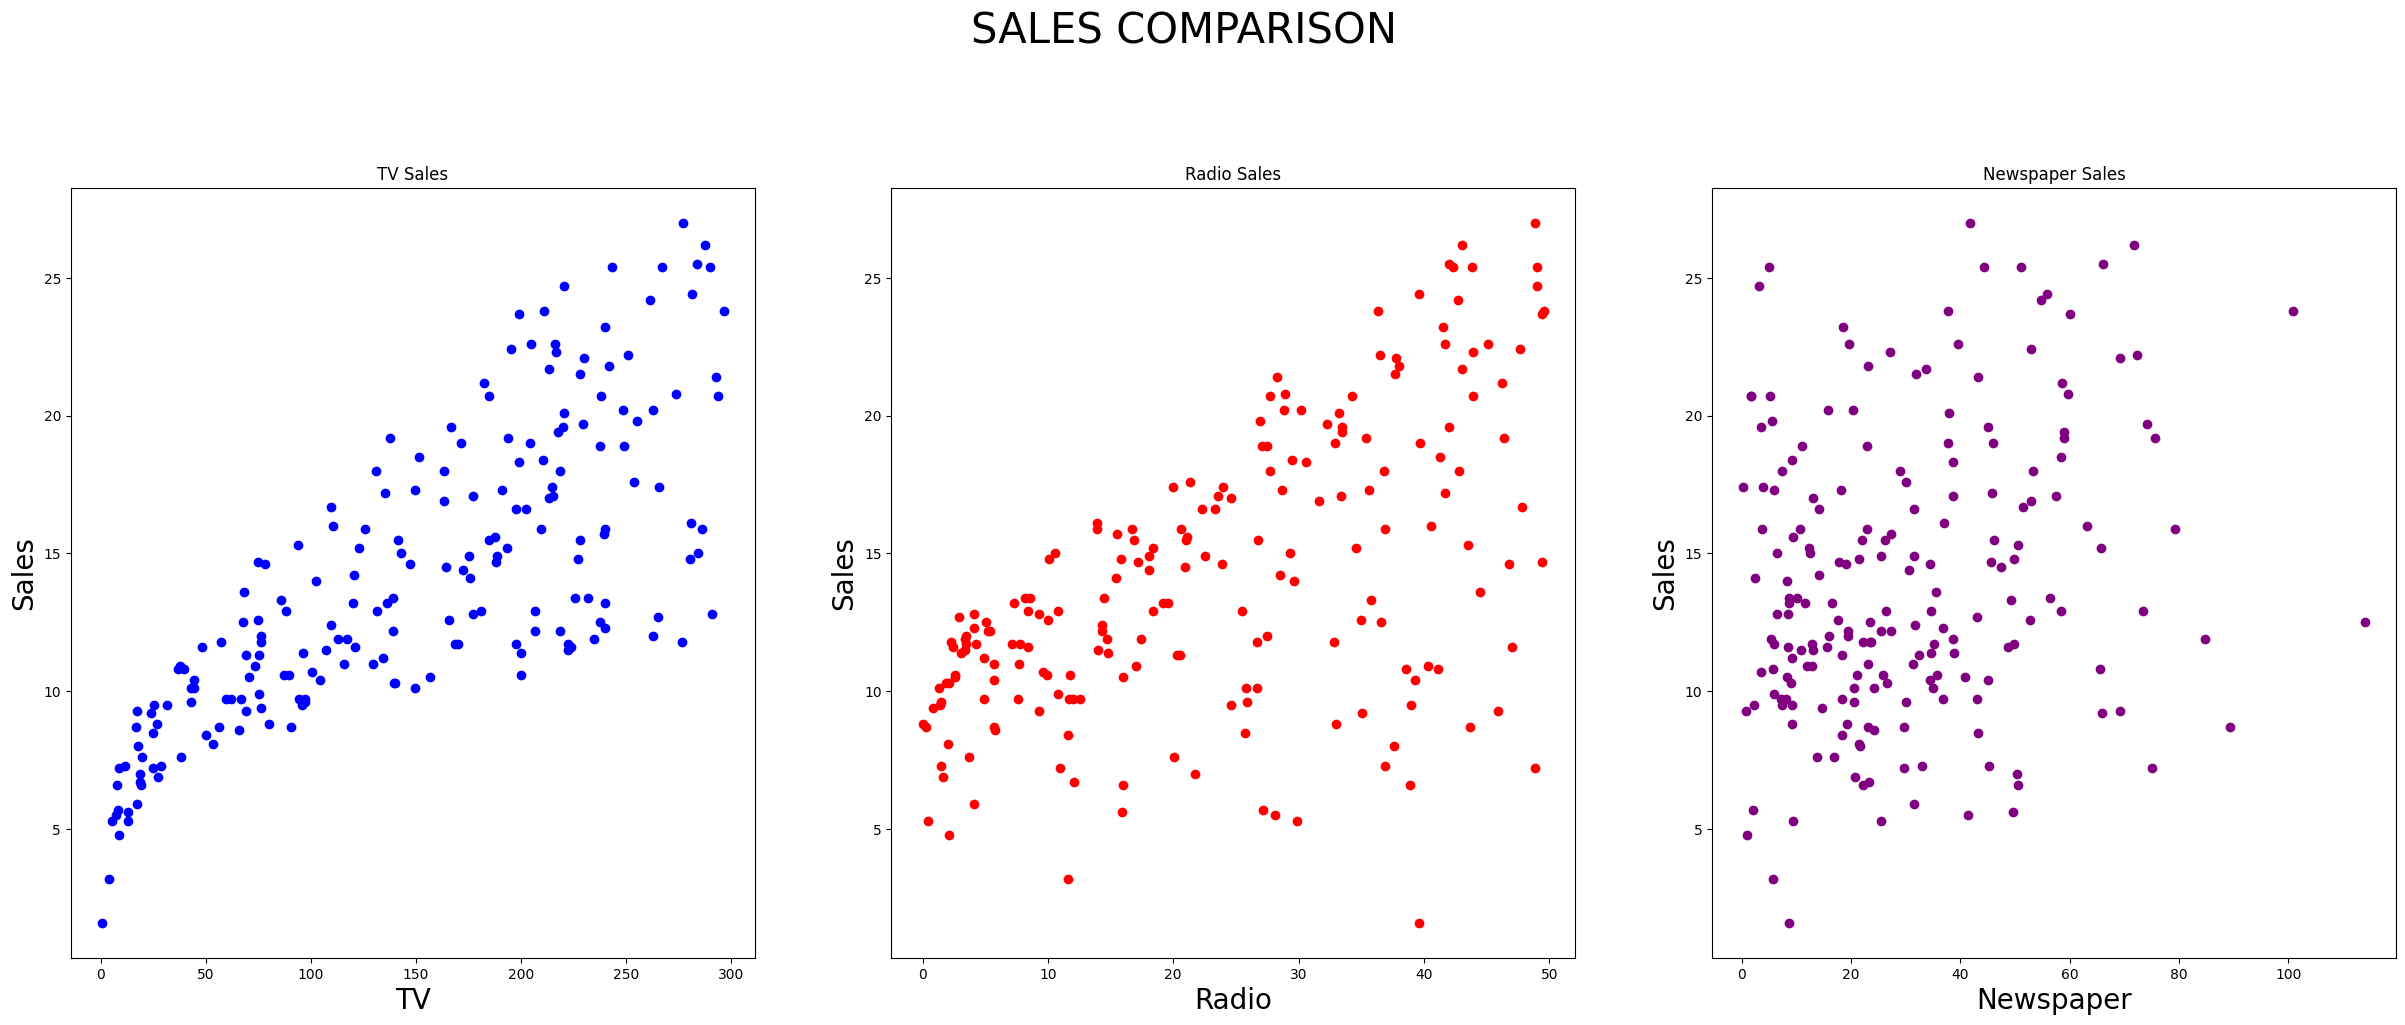

In [8]:
tv = df['TV']
radio = df['Radio']
news = df['Newspaper']
sales = df['Sales']

fig, axes = plt.subplots(1,3, figsize=(30,10))
print(axes)
ax = axes[0]
ax.scatter(tv, sales, c= 'blue')
ax.set_xlabel('TV', fontsize=20)
ax.set_ylabel('Sales', fontsize=20)
ax.set_title('TV Sales')

ax = axes[1]
ax.scatter(radio, sales, c ='red')
ax.set_xlabel('Radio', fontsize=20)
ax.set_ylabel('Sales', fontsize=20)
ax.set_title('Radio Sales')

ax = axes[2]
ax.scatter(news, sales, c ='purple')
ax.set_xlabel('Newspaper', fontsize=20)
ax.set_ylabel('Sales', fontsize=20)
ax.set_title('Newspaper Sales')

fig.text(0.425, 1.025, "SALES COMPARISON", fontsize=30)
plt.show()

In [9]:
df_temp = df

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

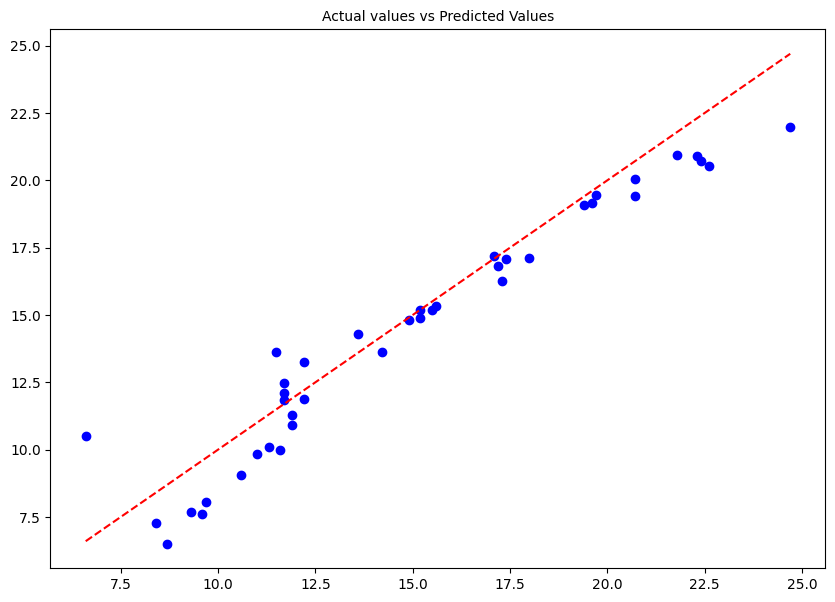

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred, c = 'b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Predicted')
plt.title('Actual values vs Predicted Values', fontsize=10)
plt.show()

In [10]:
df_test = pd.DataFrame({'Actual values':y_test, 'Predicted values':y_pred})
df_test.head(10)

,Actual values,Predicted values
126,6.6,10.509488
104,20.7,20.057236
99,17.2,16.826655
92,19.4,19.094058
111,21.8,20.943838
167,12.2,13.253489
116,12.2,11.875545
96,11.7,12.488264
52,22.6,20.514204
69,22.3,20.913288


In [26]:
print("Coefficient for TV: ", model.coef_[0])
print("Coefficient for Radio: ", model.coef_[1])
print("Coefficient for Newspaper: ", model.coef_[2])

Coefficient for TV:  0.0455863969230192
Coefficient for Radio:  0.1856981574597339
Coefficient for Newspaper:  0.0022328102410188455


In [27]:
# From the coefficients we can come to the follwing conclusions:

# - Since all coefficients are positive spending appropriate amounts on advertising for each of them leads to increase in sales.
# - Since magnitude of coefficient is highest for TV, advertisment seems to have most impact on TV sales followed by Radio and least for Newspaper.